# **Proyecto Publicidad de Productos** (Data Science y Machine Learning)

Fuente: [Kaggle](https://www.kaggle.com/datasets/singhnavjot2062001/product-advertising-data)

**Acerca del conjunto de datos:**

Explore la dinámica del impacto de la publicidad en las ventas de productos con este conjunto de datos sintetizado. Creado con el lenguaje de programación Python, el conjunto de datos consta de siete columnas que representan los costos publicitarios en diversas plataformas: televisión, vallas publicitarias, Google Ads, redes sociales, marketing de influencers y marketing de afiliación . La última columna, "Product_Sold", cuantifica el número correspondiente de unidades vendidas. Este conjunto de datos está diseñado para el análisis y la experimentación, lo que le permite profundizar en las relaciones entre los diferentes canales publicitarios y las ventas de productos resultantes. Obtenga información sobre estrategias de marketing y optimice su enfoque con este conjunto de datos completo y fácil de usar.

Este archivo, llamado Advertising_Data.csv , contiene un conjunto de datos meticulosamente creado para la exploración analítica. Con 300 filas de datos, encapsula los costos publicitarios en diversas plataformas (TV, Billboards, Google Ads, Social Media, Influencer Marketing, and Affiliate Marketing) . La séptima columna , "Product_Sold", cuantifica el número de unidades vendidas. Este conjunto de datos es un recurso valioso para investigar el impacto de la publicidad en las ventas de productos. La simplicidad de la estructura del archivo facilita el análisis y la extracción de información para estrategias de marketing eficaces.

# **1. Emarcar el problema**

# Problema/Objetivo
Analizar la correlación de cada canal publicitario frente a las unidades vendidas y finalmente predecir en base a inversión/canal cuantas unidades se esperarían vender

Datos supervisados

# Tipo de problema


1.   Es un problema supervisado:

      Tienes variables de entrada (gastos en distintas plataformas publicitarias).

      Y una variable de salida/objetivo (Product_Sold), que deseas predecir.


2.   Es un problema de regresión:

      La columna Product_Sold es una variable numérica continua (número de unidades vendidas).

      No estás clasificando en categorías, sino prediciendo una cantidad.

3.   Posiblemente es una regresión lineal (o no lineal):

      Si la relación entre los gastos publicitarios y las ventas es proporcional y directa, podría tratarse de un problema de regresión lineal.

      Si existen interacciones complejas entre canales publicitarios (por ejemplo, efectos sinérgicos o saturaciones), podrías necesitar modelos no lineales


# Datos
*  Fichero: Advertising_Data.csv
*  Formato: CSV
*  Columnas: 7
     
      -TV
      
      -Billboards
      
      -Google_Ads
      
      -Social_Media
      
      -Influencer_Marketing
      
      -Affiliate_Marketing

      -Product_Sold


# ¿Qué algoritmo podrías usar?

* Regresión lineal múltiple
      Para una primera aproximación, puedes usar LinearRegression de sklearn.

      Te permitirá evaluar si hay relaciones lineales claras entre cada tipo de publicidad y las ventas.
* Árboles de decisión / Random Forest
      Si ves que los residuos del modelo lineal no son aleatorios o el rendimiento es bajo, prueba RandomForestRegressor.

      Puede modelar relaciones no lineales y captar interacciones entre variables.
* XGBoost / Gradient Boosting
      Son modelos más potentes y precisos que Random Forest.

      Ideales si buscas mejorar el rendimiento con poca necesidad de preprocesamiento.

* Red neuronal (MLPRegressor de sklearn o Keras)
      Si hay muchos datos y relaciones complejas, puedes aplicar redes neuronales.


# Metricas recomendadas
*  Mean Absolute Error (MAE)
*  Mean Squared Error (MSE)
*  score (coeficiente de determinación)
      

In [ ]:
# @title 2. Carga de datos

import pandas as pd # importar librería pandas
import matplotlib.pyplot as plt # visualizar datos
import seaborn as sns # visualizar datos

## crear DataFrame desde csv
df_ads = pd.read_csv('sample_data/Advertising_Data.csv')
df_ads

TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0    281.42      538.80      123.94        349.30                242.77   
1    702.97      296.53      558.13        180.55                781.06   
2    313.14      295.94      642.96        505.71                438.91   
3    898.52       61.27      548.73        240.93                278.96   
4    766.52      550.72      651.91        666.33                396.33   
..      ...         ...         ...           ...                   ...   
295  770.05      501.36      694.60        172.26                572.26   
296  512.38      250.83      373.78        366.95                987.14   
297  998.10      858.75      781.06         60.61                174.63   
298  322.35      681.22      640.29        343.65                534.22   
299  476.45      884.77      301.79        802.30                434.82   

     Affiliate_Marketing  Product_Sold  
0                 910.10        7164.0  
1                 132.43        5055.0  
2                 464.23        6154.0  
3                 432.27        5480.0  
4                 841.93        9669.0  
..                   ...           ...  
295               410.56        6851.0  
296               509.03        6477.0  
297               213.53        6949.0  
298               648.71        7737.0  
299               401.69        8187.0  

[300 rows x 7 columns]



---



# **3. Analisis Exploratorio de los Datos** (EDA)

In [ ]:
df_ads.info() # Resumen estructural

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [ ]:
df_ads.describe() # Resumenn  estadístico

TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
count  300.000000  300.000000  300.000000    300.000000            300.000000   
mean   517.431000  502.644933  512.444133    489.800100            465.732567   
std    288.114792  275.842369  285.422376    273.883915            288.314080   
min      1.040000    3.630000   14.860000     11.690000              0.770000   
25%    273.090000  277.912500  250.530000    265.612500            214.480000   
50%    513.970000  533.020000  528.965000    486.385000            480.355000   
75%    774.275000  745.005000  763.345000    695.117500            703.092500   
max    998.100000  995.320000  999.230000    996.160000            999.830000   

       Affiliate_Marketing  Product_Sold  
count           300.000000    300.000000  
mean            484.430633   7031.523333  
std             277.955458   1703.614951  
min               6.740000   2259.000000  
25%             267.677500   5922.500000  
50%             451.315000   7051.000000  
75%             721.065000   8278.000000  
max             987.580000  12227.000000

In [ ]:
# Comprobar valores nulos
print(df_ads.isnull().sum())

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64


In [ ]:
# Verificar si hay filas duplicadas
duplicated_rows = df_ads.duplicated()
num_duplicated_rows = duplicated_rows.sum()
print(f'Número de filas duplicadas: {num_duplicated_rows}')

Número de filas duplicadas: 0


In [ ]:
# variables categóricas
df_ads.value_counts()

TV      Billboards  Google_Ads  Social_Media  Influencer_Marketing  Affiliate_Marketing  Product_Sold
998.10  858.75      781.06      60.61         174.63                213.53               6949.0          1
1.04    19.68       900.71      55.67         379.03                63.10                2259.0          1
4.33    593.79      71.45       454.60        980.12                295.33               5386.0          1
4.95    667.51      14.86       873.18        825.37                510.47               7236.0          1
5.77    169.34      725.49      477.59        363.65                429.30               4945.0          1
                                                                                                        ..
70.41   957.97      459.46      384.30        624.25                325.35               6724.0          1
60.41   884.67      892.10      576.07        74.29                 704.23               8472.0          1
54.08   736.44      997.23      735.75        9.53                  71.72                5940.0          1
52.01   177.25      174.17      686.41        618.69                234.05               4278.0          1
48.31   555.19      305.47      753.44        174.50                139.46               4878.0          1
Name: count, Length: 300, dtype: int64

In [ ]:
# contar valores por columna
df_ads.count()

TV                      300
Billboards              300
Google_Ads              300
Social_Media            300
Influencer_Marketing    300
Affiliate_Marketing     300
Product_Sold            300
dtype: int64

In [ ]:
# sacar valores serie
print(df_ads.sum())

TV                       155229.30
Billboards               150793.48
Google_Ads               153733.24
Social_Media             146940.03
Influencer_Marketing     139719.77
Affiliate_Marketing      145329.19
Product_Sold            2109457.00
dtype: float64


In [ ]:
# contar valores únicos
df_ads['Social_Media'].unique()

array([349.3 , 180.55, 505.71, 240.93, 666.33, 142.96, 271.62,  97.85,
       759.04, 329.15, 970.28, 992.3 , 626.87, 102.96, 358.88, 153.75,
       531.53, 609.33,  74.83,  31.38, 347.92, 252.3 , 145.03, 968.13,
       895.59, 695.95, 855.9 , 800.94, 580.06, 793.12, 526.25, 316.48,
       834.98, 213.33, 887.1 , 758.  , 170.31, 304.15, 664.95, 573.63,
        35.43, 471.67, 298.49, 109.31,  32.52, 624.03, 155.25, 586.17,
       276.39, 786.06, 470.89, 192.2 , 257.88, 829.  , 206.61, 230.22,
       254.77, 393.81, 555.73, 496.81, 910.23, 901.98, 407.08, 557.15,
       353.72, 767.46,  11.69, 369.57, 873.18, 619.22, 917.84, 694.84,
       918.84, 438.44, 725.44, 595.24, 837.4 , 162.85, 535.22, 630.16,
       657.96, 593.97, 362.43, 888.42, 539.74, 646.87, 679.08,  50.03,
       689.61, 161.65, 100.35, 285.48, 373.02, 361.36, 352.17, 595.41,
       235.03, 597.94, 421.19,  29.11, 744.64, 764.15, 477.59, 531.5 ,
       117.63, 221.03, 314.81, 884.94, 762.53, 379.17, 681.03,  48.06,
      

In [ ]:
# contar cada valor serie
df_ads.value_counts(ascending=True)

TV      Billboards  Google_Ads  Social_Media  Influencer_Marketing  Affiliate_Marketing  Product_Sold
972.28  816.97      430.30      401.46        555.19                351.30               8130.0          1
966.65  20.64       439.86      496.81        282.27                595.38               6598.0          1
966.54  617.80      850.09      731.43        999.83                354.16               9498.0          1
962.92  86.72       576.72      276.39        916.96                328.88               6153.0          1
961.72  801.42      247.44      562.54        772.64                762.27               10094.0         1
                                                                                                        ..
993.84  276.72      405.45      334.76        95.30                 398.06               5970.0          1
993.92  283.52      528.13      578.70        529.23                80.86                6026.0          1
994.40  785.92      159.25      381.83        296.66                892.39               9473.0          1
998.10  858.75      781.06      60.61         174.63                213.53               6949.0          1
1.04    19.68       900.71      55.67         379.03                63.10                2259.0          1
Name: count, Length: 300, dtype: int64

In [ ]:
df_ads['Billboards'].sort_values(ascending=False)

196    995.32
289    971.12
178    970.21
283    966.63
237    964.76
        ...  
175     12.55
66      11.00
236      6.37
37       6.01
160      3.63
Name: Billboards, Length: 300, dtype: float64

# Análisis de datos

<ipython-input-13-7baa197c9b8a>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


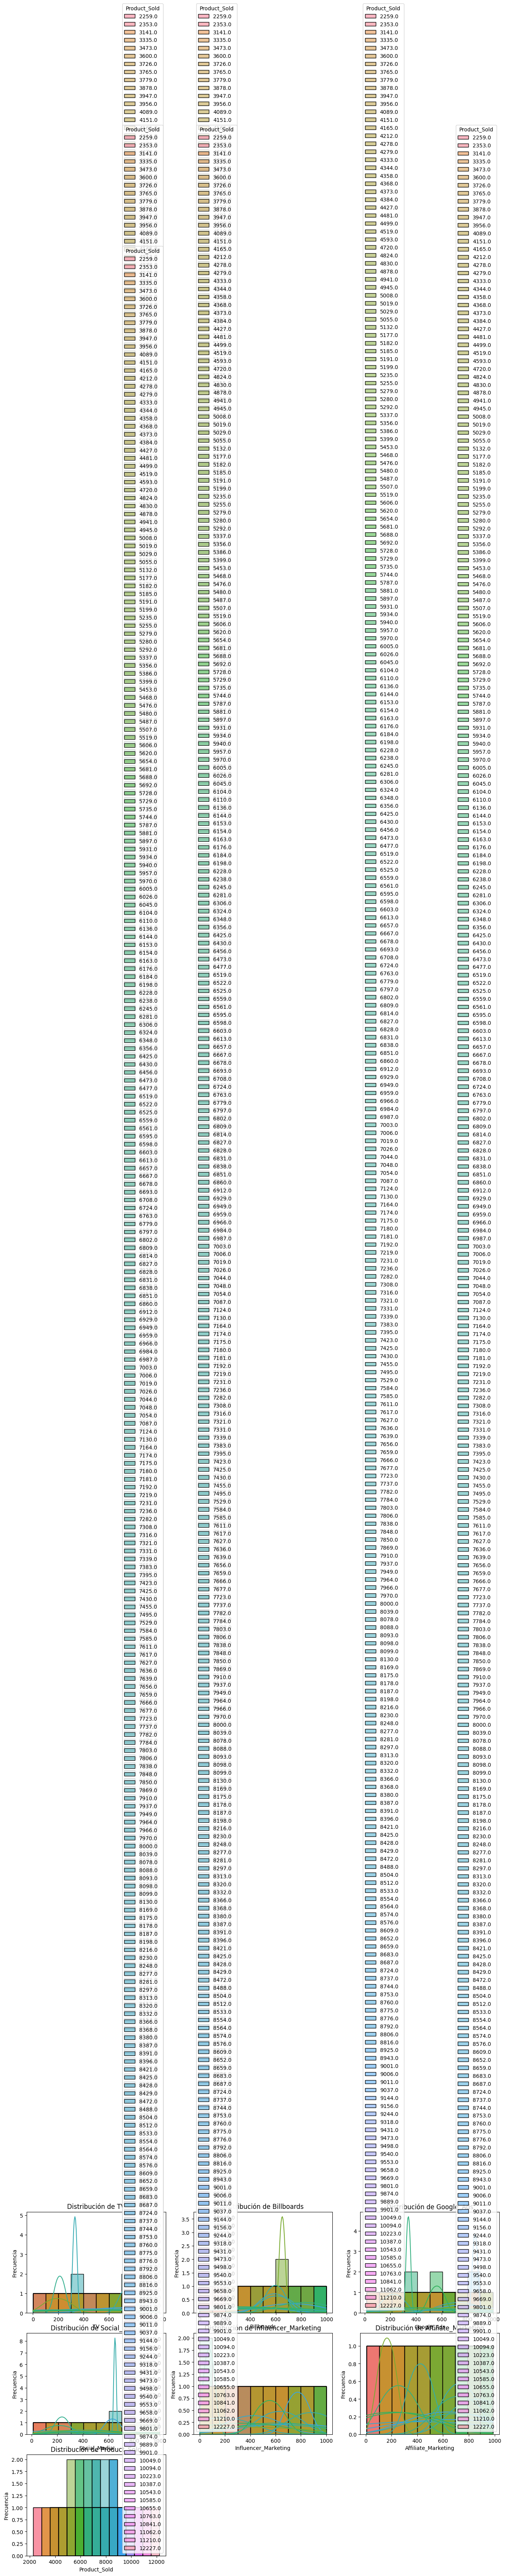

In [ ]:
# Histogramas para variables numéricas
num_columns = df_ads.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 20))
for i, col in enumerate(num_columns, 1):
    plt.subplot(5, 3, i)
    #sns.histplot(df_heart[col], kde=True, palette='husl') //alternativa
    sns.histplot(data=df_ads, x=col, hue=df_ads['Product_Sold'], kde=True, palette='husl')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

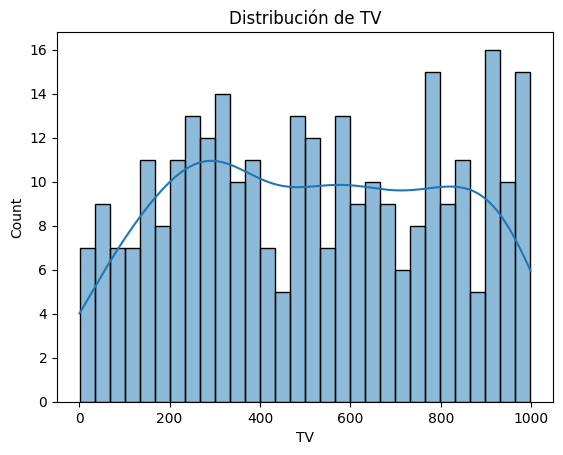

In [ ]:
#Visalizar la distribucion de TV
sns.histplot(df_ads['TV'], bins=30, kde=True)
plt.title("Distribución de TV")
plt.show()

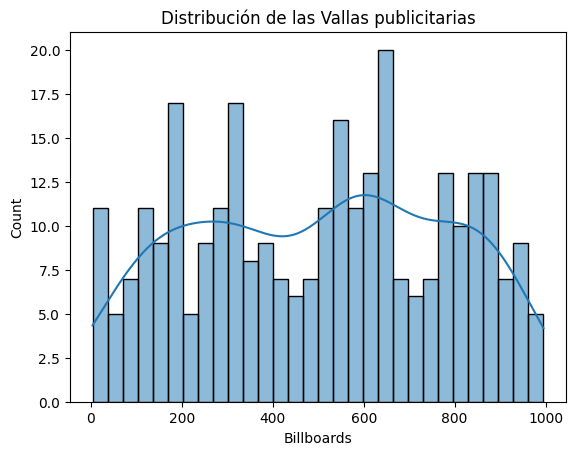

In [ ]:
#Visalizar la Distribucion de Vallas Publicitarias. [Analizar esos outlier]
sns.histplot(df_ads['Billboards'], bins=30, kde=True)
plt.title("Distribución de las Vallas publicitarias")
plt.show()

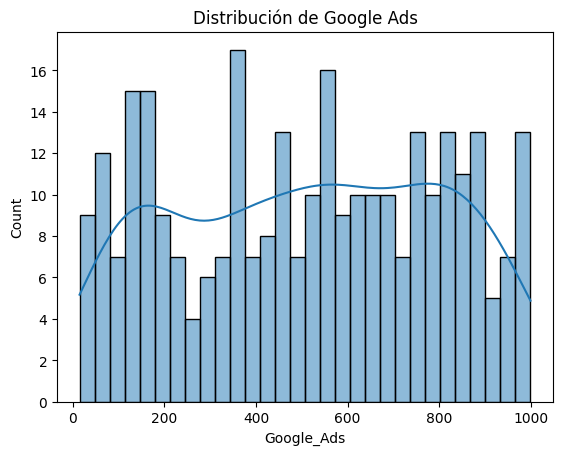

In [ ]:
# Visalizar la distribucion de Google Ads. [Analizar outlier]
sns.histplot(df_ads['Google_Ads'], bins=30, kde=True)
plt.title("Distribución de Google Ads")
plt.show()

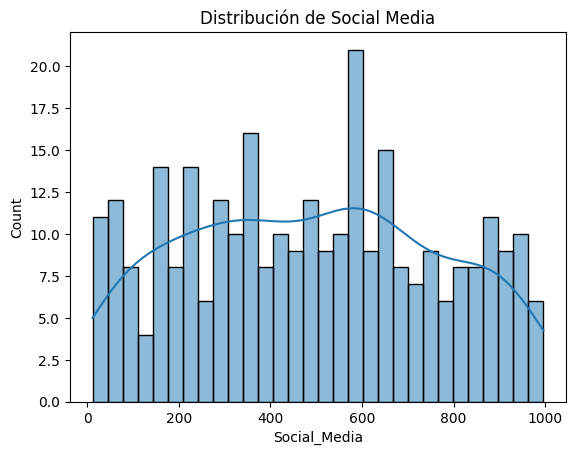

In [ ]:
# Visalizar la distribucion de Social Media. [Analizar outlier]
sns.histplot(df_ads['Social_Media'], bins=30, kde=True)
plt.title("Distribución de Social Media")
plt.show()

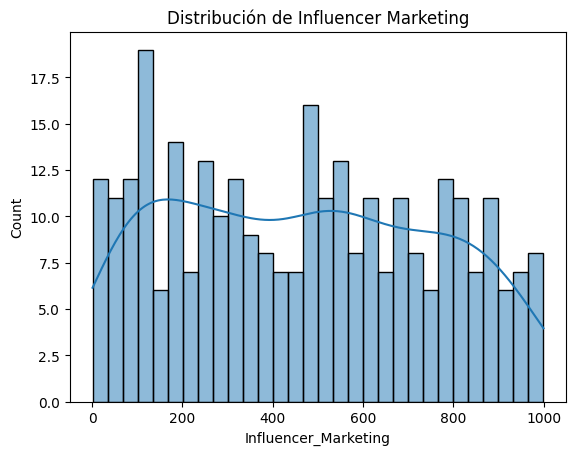

In [ ]:
# Visalizar la distribucion de Marketing de Influencers. [Analizar outlier]
sns.histplot(df_ads['Influencer_Marketing'], bins=30, kde=True)
plt.title("Distribución de Influencer Marketing")
plt.show()

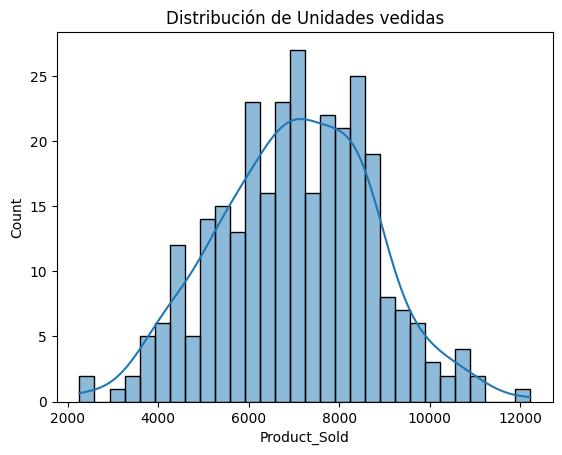

In [ ]:
# Visalizar la distribucion de Unidades vedidas. [Analizar oulier]
sns.histplot(df_ads['Product_Sold'], bins=30, kde=True)
plt.title("Distribución de Unidades vedidas")
plt.show()

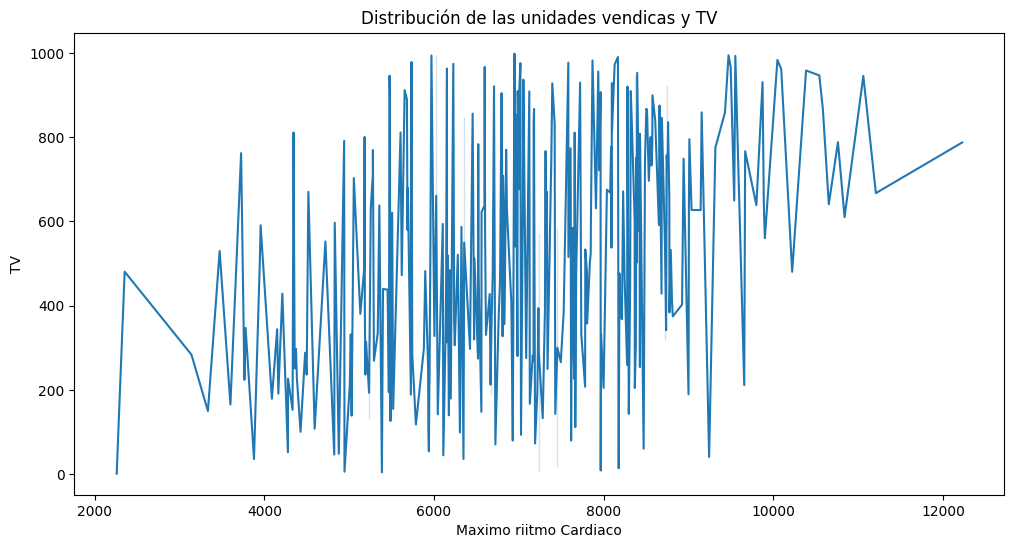

In [ ]:
# Relacion entre el máximo ritmo cardiaco y la edad
plt.figure(figsize=(12, 6))
sns.lineplot(x='Product_Sold', y='TV', data=df_ads)
plt.title("Distribución de las unidades vendicas y TV")
plt.xlabel('Edad')
plt.xlabel('Maximo riitmo Cardiaco')
plt.show()

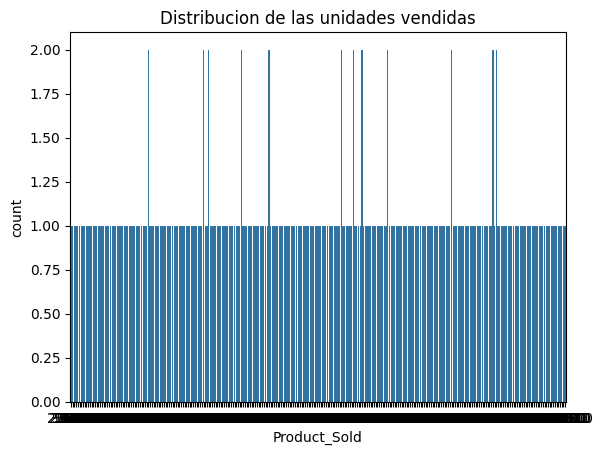

In [ ]:
# Distribucion de las unidades vendidas
sns.countplot(x='Product_Sold', data=df_ads)
plt.title("Distribucion de las unidades vendidas")
plt.show()

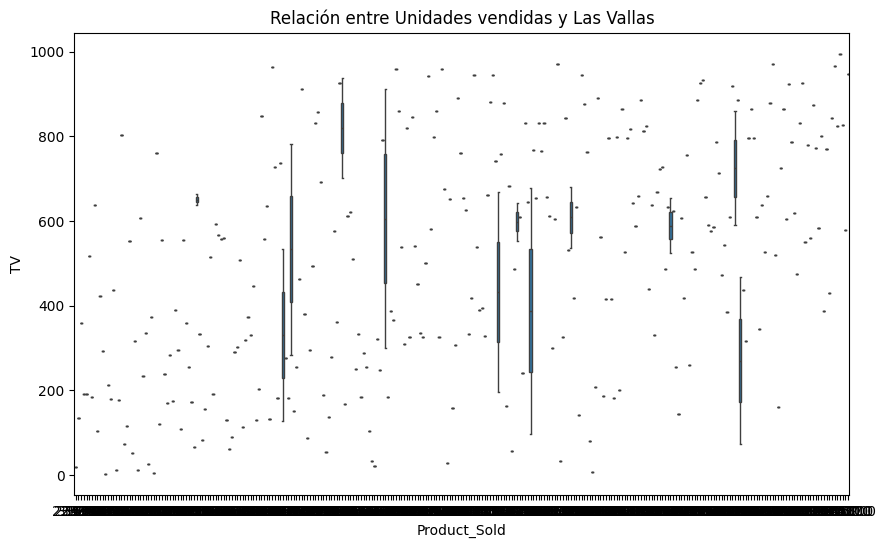

In [ ]:
# Relación entre Unidades vendidas y Las Vallas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Sold', y='Billboards', data=df_ads)
plt.title('Relación entre Unidades vendidas y Las Vallas')
plt.xlabel('Product_Sold')
plt.ylabel('TV')
plt.show()

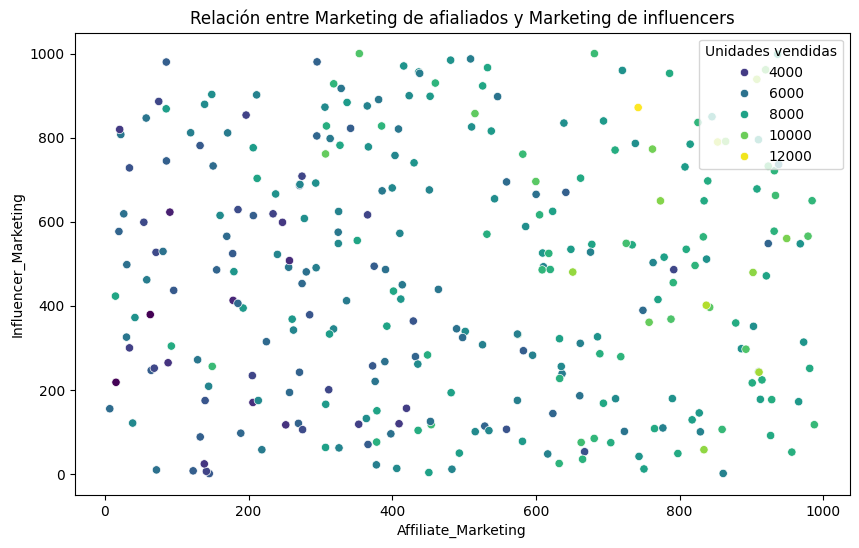

In [ ]:
# Relación entre Marketing de afialiados y Marketing de influencers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Affiliate_Marketing', y='Influencer_Marketing', data=df_ads, hue='Product_Sold', palette='viridis')
plt.title('Relación entre Marketing de afialiados y Marketing de influencers')
plt.xlabel('Affiliate_Marketing')
plt.ylabel('Influencer_Marketing')
plt.legend(title='Unidades vendidas', loc='best')
plt.show()

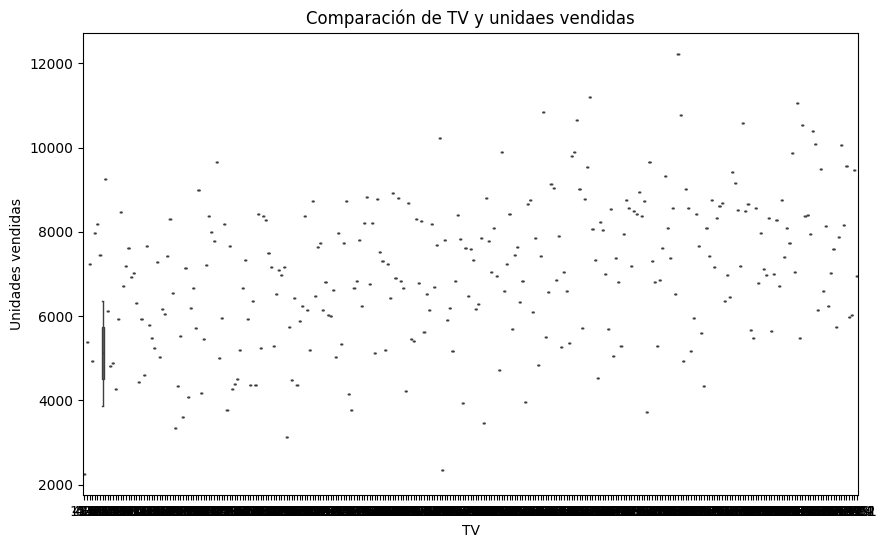

In [ ]:
# @title Dashboard
# Comparación de TV y unidaes vendidas
plt.figure(figsize=(10, 6))
sns.boxplot(x='TV', y='Product_Sold', data=df_ads)
plt.title('Comparación de TV y unidaes vendidas')
plt.xlabel('TV')
plt.ylabel('Unidades vendidas')
plt.show()


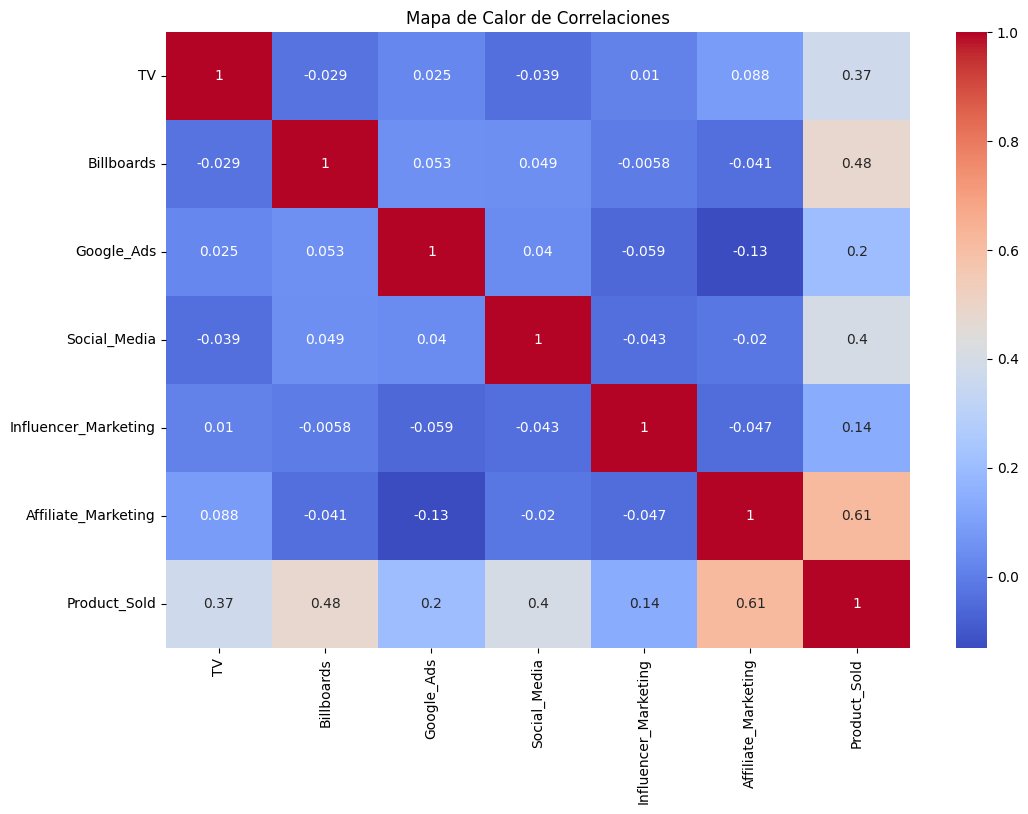

In [ ]:
# @title Mapa de Calor Correlaciones
# Correlación entre las variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_ads.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

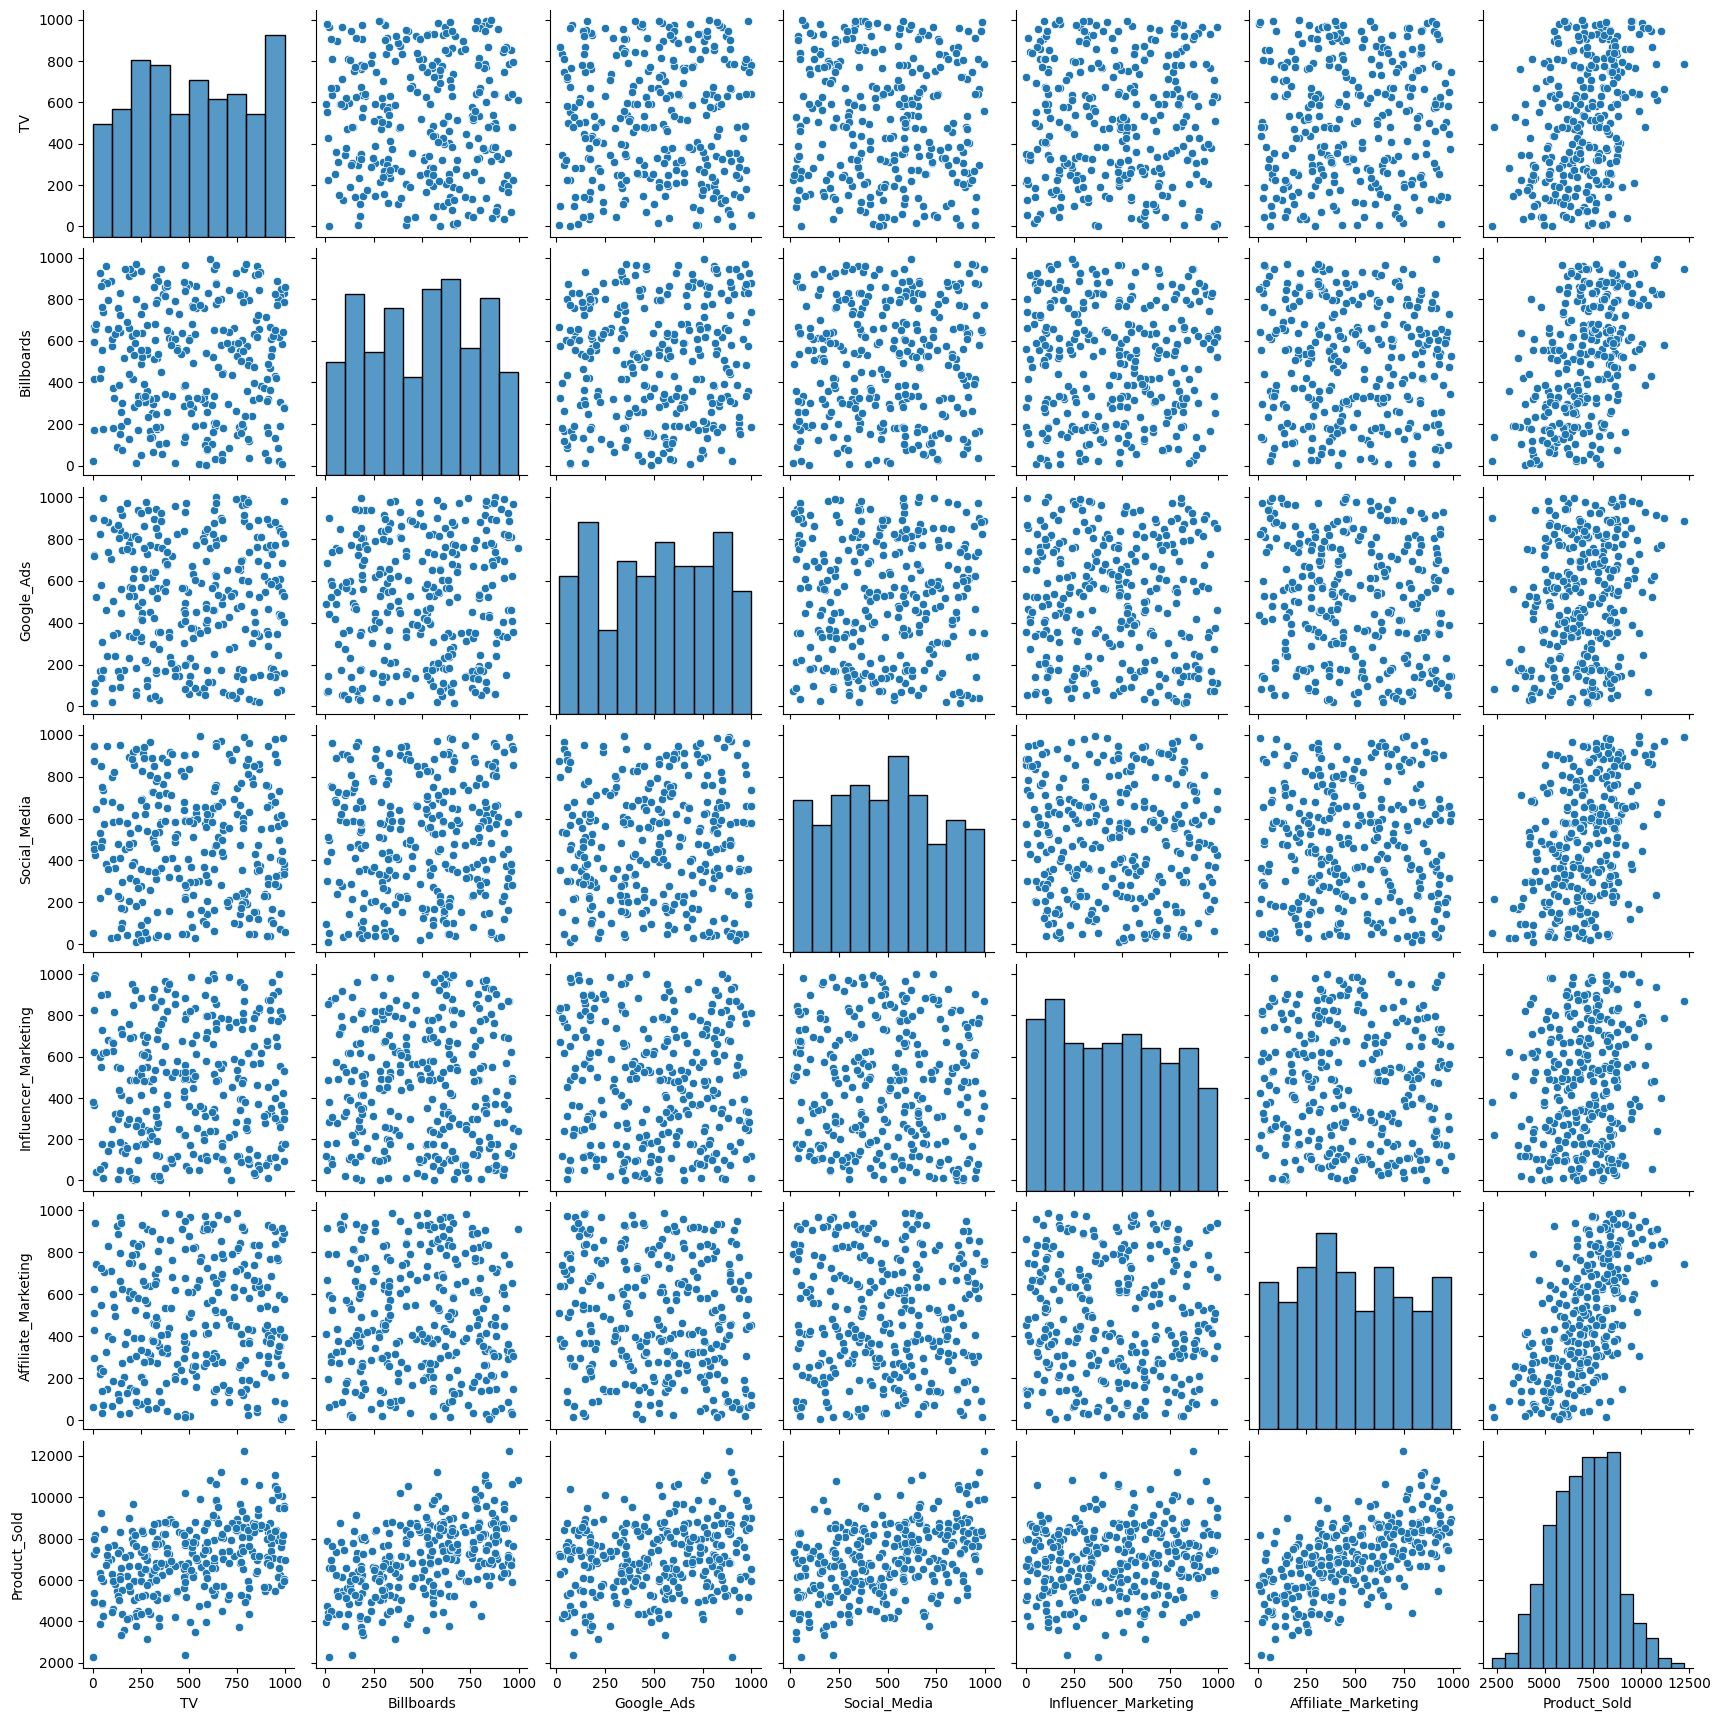

In [ ]:
sns.pairplot(df_ads)
# to show
plt.show()

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=374cd608347940de4c05d39de754acb4075b70c6459db35b8810d71708884d19
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

# Generar el reporte de pandas-profiling
profile = ProfileReport(df_ads, title="Reporte de Análisis Exploratorio de Datos", explorative=True)

# Mostrar el reporte
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 105.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#3. **Preparación de los datos**


In [ ]:
# Missing values imputation
# Si no se pueden eliminar, se imputan (rellenan)
median_values = df_ads.median()
df_heart = df_ads.fillna(median_values)

In [ ]:
# Outliers
# Eliminar

In [ ]:
# Escalamiento o Scaling
from sklearn.preprocessing import StandardScaler
#print(df_heart.head())
features_to_transform = ['trestbps', 'chol', 'thalach']
scaler = StandardScaler()
#df_heart[features_to_transform] = scaler.fit_transform(df_heart[features_to_transform])
df_ads.head()

TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0  281.42      538.80      123.94        349.30                242.77   
1  702.97      296.53      558.13        180.55                781.06   
2  313.14      295.94      642.96        505.71                438.91   
3  898.52       61.27      548.73        240.93                278.96   
4  766.52      550.72      651.91        666.33                396.33   

   Affiliate_Marketing  Product_Sold  
0               910.10        7164.0  
1               132.43        5055.0  
2               464.23        6154.0  
3               432.27        5480.0  
4               841.93        9669.0

**Features (x) vs Target (y)**


---



In [ ]:
X = df_ads.drop(columns=['Product_Sold'], axis=1)
y = df_ads['Product_Sold']

**Trainig - Test split**

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. **Feature Selection** (Selección de características)

In [ ]:
from sklearn.feature_selection import SelectKBest # Métodos integrados o Métodos basados en modelos
from sklearn.feature_selection import chi2 # Métodos filtro basado en correlaciones

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

X_selected = fit.transform(X_train)
X_selected

array([[8.6683e+02, 3.2732e+02, 8.3456e+02, 6.3898e+02],
       [9.6665e+02, 2.0640e+01, 2.8227e+02, 5.9538e+02],
       [4.8664e+02, 5.5502e+02, 7.0040e+01, 3.6625e+02],
       [3.6040e+01, 4.2325e+02, 5.9843e+02, 2.4719e+02],
       [5.9038e+02, 5.4199e+02, 6.8864e+02, 2.7146e+02],
       [4.3957e+02, 5.6654e+02, 1.2021e+02, 2.6941e+02],
       [5.9680e+02, 1.2150e+02, 1.0609e+02, 5.5905e+02],
       [2.3720e+02, 2.9947e+02, 1.0013e+02, 8.2894e+02],
       [8.0014e+02, 5.7692e+02, 2.8579e+02, 6.8901e+02],
       [4.7517e+02, 3.8097e+02, 2.2000e+02, 3.7620e+02],
       [8.9943e+02, 7.1296e+02, 7.5720e+01, 3.7828e+02],
       [3.7535e+02, 8.6054e+02, 6.1920e+01, 3.2588e+02],
       [4.6410e+01, 7.6080e+02, 7.2795e+02, 3.4150e+01],
       [8.5578e+02, 6.2044e+02, 4.6173e+02, 5.8230e+01],
       [9.7228e+02, 8.1697e+02, 5.5519e+02, 3.5130e+02],
       [7.4629e+02, 9.2580e+02, 2.8295e+02, 4.4915e+02],
       [4.3810e+02, 5.5671e+02, 5.7668e+02, 1.9490e+01],
       [2.8046e+02, 6.7619e+02,

# **5. Entrenamiento de Modelos** (seleccionar los mejores)

Para este caso traeremos diferentes modelos de clasificación:

*   Regresión lineal múltiple
*   Árboles de decisión / Random Forest
*   XGBoost / Gradient Boosting
*   Red neuronal (MLPRegressor de sklearn o Keras)


Coeficientes: [2.00182317 2.9985323  1.49807126 2.49979705 1.19965944 3.99662486]
Intercepto: 1.3474765058381308
R² (score): 0.9999736866138691
Mean Absolute Error (MAE): 7.085373922626112
Mean Error cuadrático medio (MSE): 75.36591771292059


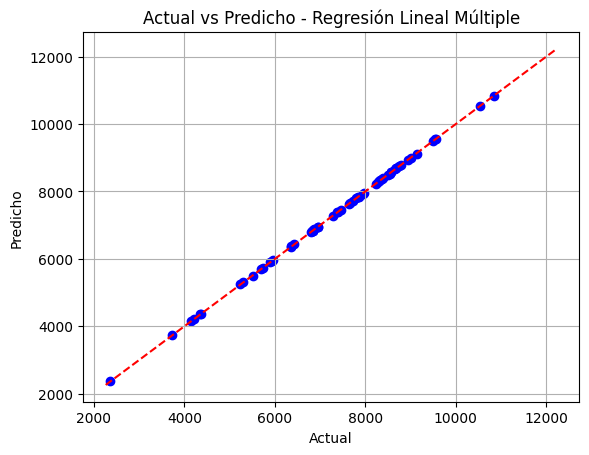

In [ ]:
# @title Modelo: Regresión lineal múltiple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Entrenar el modelo
model_rl = LinearRegression()
model_rl.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_rl.predict(X_test)

# Evaluar el modelo
print("Coeficientes:", model_rl.coef_) # Importancia de cada canal publicitario.
print("Intercepto:", model_rl.intercept_) # Punto de inicio de la predicción.
print("R² (score):", r2_score(y_test, y_pred)) # Qué tan bien se ajusta el modelo (1 = perfecto).
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))

# Visualización (opcional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicho')
plt.title('Actual vs Predicho - Regresión Lineal Múltiple')
plt.grid()
plt.show()

In [ ]:
# @title Modelos: Random Forest, XGBoost y Red Neuronal (MLPRegressor)
!pip install scikit-learn xgboost

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

# Función para evaluar cada modelo
def evaluar_modelo(modelo, nombre):
    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Predecir con datos de prueba
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Imprimir resultados
    print(f"\n📊 Resultados para {nombre}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

    return modelo

# Modelo 1: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluar_modelo(rf, "Random Forest")

# Modelo 2: XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
evaluar_modelo(xgb, "XGBoost")

# Modelo 3: Red Neuronal (MLPRegressor)
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
evaluar_modelo(mlp, "Red Neuronal (MLP)")



📊 Resultados para Random Forest:
Mean Absolute Error (MAE): 506.46
Mean Squared Error (MSE): 435433.68
R² Score: 0.85

📊 Resultados para XGBoost:
Mean Absolute Error (MAE): 561.52
Mean Squared Error (MSE): 475289.48
R² Score: 0.83

📊 Resultados para Red Neuronal (MLP):
Mean Absolute Error (MAE): 16.33
Mean Squared Error (MSE): 448.24
R² Score: 1.00


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Conclusión evaluando Modelos de entrenamiento
Según los datos arrojados en los entrenamientos de los 4 modelos, los que mejor rendimiento tienen (se acercan a 1), con el R² Score, son:


*   Regresión Lineal Múltiple: 0.999
*   Red Neuronal (MLP): 1.0



# **6. Optimización de Modelo** Ajustar hiperparámetros

Ajustar los parámetros y qué el modelo arroje mejores resultados

In [ ]:
# @title Optimización de Regresión Lineal Múltiple
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Para aplicar regularización, vamos a explorar variantes como la Regresión Ridge y Regresión Lasso
# Define los modelos con rangos de alpha
ridge = Ridge()
lasso = Lasso()

# Parámetros a probar
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearch para Ridge
ridge_grid = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# GridSearch para Lasso
lasso_grid = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

# Encontramos el mejor valor del parámetro de regularización alpha
print("Mejor Ridge alpha:", ridge_grid.best_params_)
print("Mejor Ridge score/alpha:", ridge_grid.best_score_)
# 117.504 es el valor promedio del Error Cuadrático Medio (MSE) en validación cruzada.
# Cuanto más bajo, mejor es el modelo (menor error).
# Si estás prediciendo ventas y el MSE es 117.5, eso quiere decir que el error promedio al cuadrado entre las predicciones y los valores reales es 117.5 unidades².

resultados = pd.DataFrame(ridge_grid.cv_results_)
resultados = resultados[['param_alpha', 'mean_test_score', 'rank_test_score']]
print(resultados.sort_values('rank_test_score'))

Mejor Ridge alpha: {'alpha': 100}
Mejor Ridge score/alpha: -117.50479182461306
Mejor Lasso alpha: {'alpha': 10}
Mejor Lasso score/alpha: -117.51302161188065
   param_alpha  mean_test_score  rank_test_score
4       100.00      -117.504792                1
3        10.00      -117.505878                2
2         1.00      -117.506001                3
1         0.10      -117.506014                4
0         0.01      -117.506015                5


In [ ]:
# @title Optimización de Red Neuronal MLP
# Podemos ajustar muchos hiperparámetros, como:
# Número de capas y neuronas (hidden_layer_sizes)
# Activación (activation)
# Tasa de aprendizaje (learning_rate_init)
# Número de iteraciones (max_iter)
# Aquí va un GridSearchCV aplicado a MLPRegressor:

from sklearn.neural_network import MLPRegressor

# Definir el modelo base
mlp = MLPRegressor(random_state=42, max_iter=1000)

# Definir la grilla de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Ejecutar búsqueda de hiperparámetros
mlp_grid = GridSearchCV(mlp, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
mlp_grid.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros MLP:", mlp_grid.best_params_)

# Evaluar modelo optimizado
best_mlp = mlp_grid.best_estimator_
y_pred = best_mlp.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores hiperparámetros MLP: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}
MAE: 12.770684017064545
MSE: 336.6674164676644
R2 Score: 0.9998824553591855


In [ ]:
# @title Guardar los modelos optimizados
# Una vez hayamos obtenido el algoritmo que mejor se adapte al problema y el error sea mas cecano a 1. Lo guardamos
# Guardar el modelo Ridge (puedes cambiarlo por Lasso si usaste ese)
!pip install joblib
import joblib

joblib.dump(ridge_grid.best_estimator_, 'modelo_rl_ridge.pkl')

# Guardar el modelo MLP
joblib.dump(mlp_grid.best_estimator_, 'modelo_mlp.pkl')

['modelo_mlp.pkl']

# **7. Prediciendo ventas**
Ahora mediante algunos ejemplos de ventas invirtiendo dinero en los diferentes canales de abubcios, prediciremos el numero de ventas mediante el modelo previamente guardado

In [ ]:
import numpy as np
import joblib

# Cargamos el modelo desde el archivo
modelo_ridge = joblib.load('modelo_rl_ridge.pkl')

# Probamos con un ejemplo de datos -----------------------------
dato_nuevo = np.array([[150.0, 20.0, 35.0, 204.0, 500.0, 12.0]])  # TV, Billboards, Google_Ads, Social_Media, Influencer_Marketing, Affiliate_Marketing

# Hacemos la predicción de ventas
prediccion = modelo_ridge.predict(dato_nuevo)
print("Ventas estimadas:", f"{prediccion[0]:.2f}") # 1571.80

# Probamos con una tanda de ejemplos de datos -------------------
datos_nuevos = np.array([
    [150.0, 20.0, 35.0, 204.0, 500.0, 12.0],
    [100.0, 15.0, 25.0, 180.0, 400.0, 10.0],
    [200.0, 15.0, 30.0, 377.0, 800.0, 65.0],
    [100.0, 10.0, 25.0, 180.0, 400.0, 10.0],
    [200.0, 15.0, 30.0, 377.0, 800.0, 65.0]
])

predicciones = modelo_ridge.predict(datos_nuevos)
for i, pred in enumerate(predicciones):
    print(f"Ejemplo {i+1}: Ventas estimadas = {pred:.2f}")

Ventas estimadas: 1571.80
Ejemplo 1: Ventas estimadas = 1571.80
Ejemplo 2: Ventas estimadas = 1253.79
Ejemplo 3: Ventas estimadas = 2653.59
Ejemplo 4: Ventas estimadas = 1238.79
Ejemplo 5: Ventas estimadas = 2653.59
